In [4]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
messages = [line.strip for line in open("SMSSpamCollectionf")]

In [6]:
len(messages)

5574

In [1]:
import pandas as pd 
import numpy as np 

In [15]:
df = pd.read_csv("SMSSpamCollectionf",sep="\t",names=["Type of the message","Message"])

In [17]:
df.head()

,Type of the message,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.describe()

,Type of the message,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
df.groupby("Type of the message").describe()

Message         \
                      count unique   
Type of the message                  
ham                    4825   4516   
spam                    747    653   

                                                                             
                                                                   top freq  
Type of the message                                                          
ham                                             Sorry, I'll call later   30  
spam                 Please call our customer service representativ...    4

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use("seaborn")
%matplotlib inline

In [30]:
df["length"] = df["Message"].apply(len)

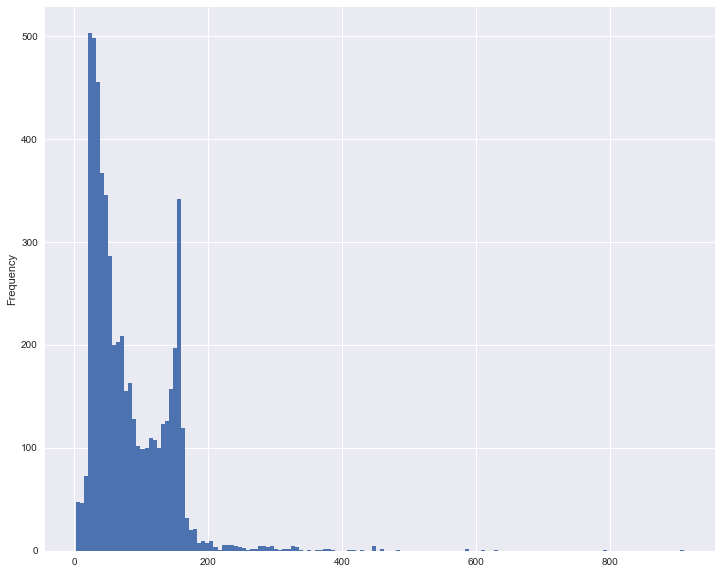

In [31]:
plt.figure(figsize=(12,10))
df["length"].plot(kind="hist",bins=150)

In [59]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<Figure size 864x720 with 0 Axes>

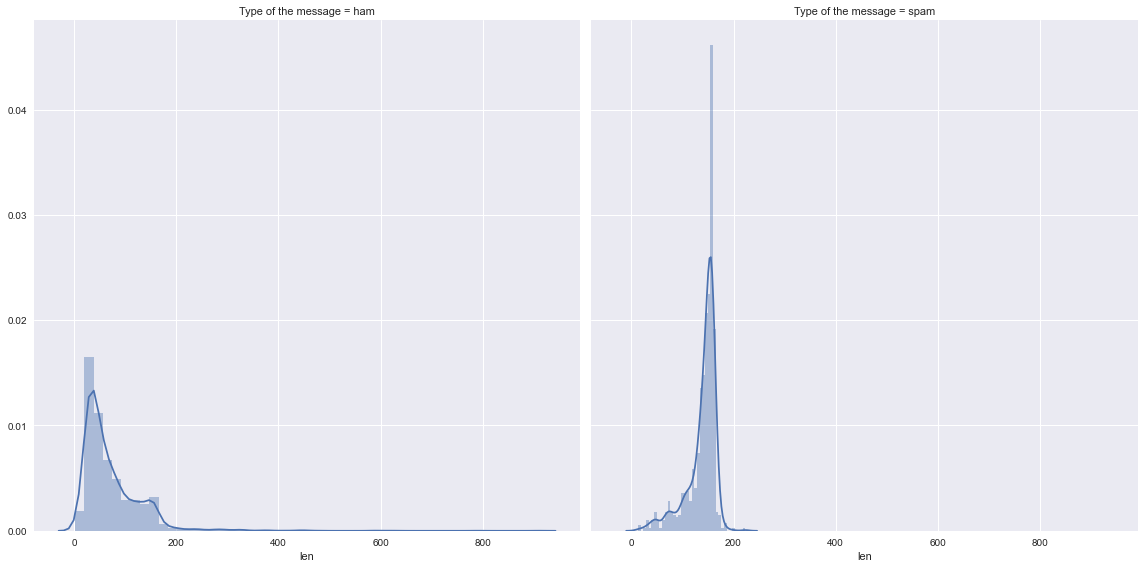

In [56]:
plt.figure(figsize=(12,10))
g = sns.FacetGrid(df,col="Type of the message",height=8,aspect=1)
g.map(sns.distplot,"len")

In [60]:
import string

In [121]:
mess= "Messagem de exemplo: Ela possuí pontuação."

In [122]:
mess

'Messagem de exemplo: Ela possuí pontuação.'

In [123]:
sem_pont = [char for char in mess if char not in string.punctuation]

In [124]:
sem_pont

['M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 'm',
 ' ',
 'd',
 'e',
 ' ',
 'e',
 'x',
 'e',
 'm',
 'p',
 'l',
 'o',
 ' ',
 'E',
 'l',
 'a',
 ' ',
 'p',
 'o',
 's',
 's',
 'u',
 'í',
 ' ',
 'p',
 'o',
 'n',
 't',
 'u',
 'a',
 'ç',
 'ã',
 'o']

In [125]:
sem_pont = ''.join(sem_pont)

In [126]:
sem_pont

'Messagem de exemplo Ela possuí pontuação'

In [86]:
exemplo = "A B C D".split()



In [87]:
"--".join(exemplo)

'A--B--C--D'

In [88]:
from nltk.corpus import stopwords

In [89]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [90]:
tst = "Sample message! Notice: it has punctuation."

In [127]:
cln_mess = [word for word in tst.split() if word.lower() not in stopwords.words("english")] 

In [101]:
" ".join(cln_mess)

'Sample message: punctuation'

In [140]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [143]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    sms = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]
    return sms

In [144]:
df.head()

,Type of the message,Message,len,length
0,ham,"Go until jurong point, crazy.. Available only ...",111,111
1,ham,Ok lar... Joking wif u oni...,29,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,ham,U dun say so early hor... U c already then say...,49,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61


In [145]:
df["Message"].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [146]:
from sklearn.feature_extraction.text import CountVectorizer

In [147]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df["Message"])

In [152]:
print(len(bow_transformer.vocabulary_))

11425


In [155]:
message4= df["Message"][3]

In [156]:
message4

'U dun say so early hor... U c already then say...'

In [157]:
bow_4 = bow_transformer.transform([message4])

In [158]:
print(bow_4)

(0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [159]:
print(bow_transformer.get_feature_names()[4068])

U


In [160]:
print(bow_transformer.get_feature_names()[9554])

say


In [161]:
messages_bow = bow_transformer.transform(df["Message"])

In [163]:
print(messages_bow.shape)
print(messages_bow.nnz)

(5572, 11425)
50548


In [166]:
from sklearn.feature_extraction.text import TfidfTransformer

In [167]:
tfidf_tranformer = TfidfTransformer()

In [168]:
tfidf_tranformer.fit(messages_bow)

TfidfTransformer()

In [172]:
tfidf4 = tfidf_tranformer.transform(bow_4)

In [174]:
print(tfidf4)

(0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [175]:
print(tfidf_tranformer.idf_[bow_transformer.vocabulary_["university"]])

8.527076498901426


In [176]:
from sklearn.naive_bayes import MultinomialNB

In [178]:
messages_tfidf= tfidf_tranformer.transform(messages_bow)

In [180]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,df["Type of the message"])

In [183]:
print("Predito:",spam_detect_model.predict(tfidf4)[0],"\nEsperado:",df["Type of the message"][3])

Predito: ham 
Esperado: ham


In [184]:
from sklearn.model_selection import train_test_split

In [186]:
message_train,message_test,label_train,label_test = train_test_split(df["Message"],df["Type of the message"],test_size=0.2)

In [187]:
message_train

1979    No I'm in the same boat. Still here at my moms...
2158    Sad story of a Man - Last week was my b'day. M...
2739    I sent you the prices and do you mean the  &lt...
4392    The greatest test of courage on earth is to be...
3714    If i not meeting ü all rite then i'll go home ...
                              ...                        
5378    Free entry to the gr8prizes wkly comp 4 a chan...
4710    Haha awesome, I might need to take you up on t...
2253                 Den wat will e schedule b lk on sun?
3785              Dear got train and seat mine lower seat
3349                               Sorry, I'll call later
Name: Message, Length: 4457, dtype: object

In [190]:
from sklearn.pipeline import Pipeline

In [212]:
pipeline = Pipeline([
    ("bow",CountVectorizer(analyzer=text_process)),
    ("tftidf",TfidfTransformer()),
    ("classifier",RandomForestClassifier(n_estimators=500))
    ])

In [214]:
pipeline.fit(message_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000025F8C673AF0>)),
                ('tftidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier(n_estimators=500))])

In [215]:
pred = pipeline.predict(message_test)

In [216]:
from sklearn.metrics import classification_report, confusion_matrix


In [217]:
print(classification_report(pred, label_test))

precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1005
        spam       0.73      1.00      0.84       110

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115



In [218]:
print(confusion_matrix(pred,label_test))

[[964  41]
 [  0 110]]


In [211]:
from sklearn.ensemble import RandomForestClassifier